# Import all necessary libraries

In [3]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Requesting HTML from website using requests

In [24]:
for i in range(1, 21):
    url = f"https://internshala.com/jobs/computer-science-jobs/page-{i}/"
    response = requests.get(url)
    with open(f"HTMLs/page{i}.html", 'w', encoding="utf-8") as html_file:
        html_file.write(response.text)
        print(f"HTML{i} written successfully")

HTML1 written successfully
HTML2 written successfully
HTML3 written successfully
HTML4 written successfully
HTML5 written successfully
HTML6 written successfully
HTML7 written successfully
HTML8 written successfully
HTML9 written successfully
HTML10 written successfully
HTML11 written successfully
HTML12 written successfully
HTML13 written successfully
HTML14 written successfully
HTML15 written successfully
HTML16 written successfully
HTML17 written successfully
HTML18 written successfully
HTML19 written successfully
HTML20 written successfully


# Scraping data using BeautifulSoup

In [65]:
all_jobs = []

for i in range(1, 21):
    try:
        with open(f"HTMLs/page{i}.html", encoding="utf-8") as f:
            content = f.read()
    except FileNotFoundError:
        print(f"File HTMLs/page{i}.html not found.")
        continue

    soup = BeautifulSoup(content, 'lxml')
    items = soup.find_all('div', class_="internship_meta experience_meta")

    for j in items:
        title_tag = j.find('h3')
        title = title_tag.a.text.strip() if title_tag and title_tag.a else None

        company_tag = j.select_one("p.company-name")
        company = company_tag.text.strip() if company_tag else None

        tag = j.select_one("div.detail-row-1")
        spans = tag.find_all('span') if tag else []
        tag2 = j.select_one("div.detail-row-2")

        location = spans[0].text.strip() if len(spans) > 0 else None
        salary = spans[1].text.strip() if len(spans) > 1 else None
        experience = spans[3].text.strip() if len(spans) > 3 else None
        time = tag2.span.text.strip() if tag2 else None

        job = {
            'Title': title,
            'Company': company,
            'Location': location,
            'Salary': salary,
            'Experience (Years)': experience,
            'Time': time
        }

        all_jobs.append(job)

    df = pd.DataFrame(all_jobs)

    df.to_csv("scraped_jobs.csv", index=False, encoding='utf-8')
    print("Saved to scraped_jobs.csv")

Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv
Saved to scraped_jobs.csv


# Data Cleaning

In [2014]:
data = pd.read_csv(r"D:\Data Science\Projects\CS Job Market Analysis\scraped_jobs.csv")
df = pd.DataFrame(data)
df

,Title,Company,Location,Salary,Experience (Years),Time
0,.NET Developer,Sped@home,Mumbai,"₹ 2,50,000 - 3,00,000",1 year(s),1 week ago
1,Associate Software Developer,Design Centric,"Navi Mumbai, Mumbai","₹ 3,18,000 - 4,00,000",1 year(s),3 weeks ago
2,Founders Office,Curious About Sales,Nagpur,"₹ 2,50,000 - 4,00,000",0 year(s),3 days ago
3,3D Artist & VFX Artist,Connex India,"Delhi, Gurgaon, Noida","₹ 2,00,000 - 2,40,000",1 year(s),5 days ago
4,STEM Innovation Engineer/Mentor,Stemmantra Technologies Private Limited,"Delhi, Gurgaon, Hyderabad","₹ 2,03,500 - 3,30,000",0 year(s),2 weeks ago
...,...,...,...,...,...,...
797,SAP GTS Consultant,Kiash Solutions LLP,"Chennai, Hyderabad, Bangalore","₹ 15,00,000 - 25,00,000",7 year(s),3 weeks ago
798,React Native Developer,Versatile Commerce,Hyderabad,Competitive salary,1 year(s),3 weeks ago
799,Power BI Consultant,NETSACH GLOBAL,Bangalore,Competitive salary,4 year(s),3 weeks ago
800,Jr. Database Developer,Xomic Infotech Private Limited,Ahmedabad,"₹ 2,40,000 - 3,60,000",1 year(s),3 weeks ago


In [2016]:
df.columns

Index(['Title', 'Company', 'Location', 'Salary', 'Experience (Years)', 'Time'], dtype='object')

In [2018]:
df.dtypes

Title                 object
Company               object
Location              object
Salary                object
Experience (Years)    object
Time                  object
dtype: object

In [2020]:
df.describe()

,Title,Company,Location,Salary,Experience (Years),Time
count,802,802,767,773,802,802
unique,492,457,148,246,42,12
top,Full Stack Developer,Intertec Softwares Pvt Ltd,Work from home,Competitive salary,1 year(s),3 weeks ago
freq,46,34,181,188,327,356


In [2022]:
# Count of NULL values in each column
df.isnull().sum()

Title                  0
Company                0
Location              35
Salary                29
Experience (Years)     0
Time                   0
dtype: int64

In [2024]:
# Removing rows with Salary = NULL
df.dropna(subset=["Salary"], inplace=True)

In [2026]:
df.isnull().sum()

Title                  0
Company                0
Location              35
Salary                 0
Experience (Years)     0
Time                   0
dtype: int64

In [2028]:
# Filling NAN values in Location column with "Unknown"
df["Location"] = df["Location"].fillna("Unknown")

In [2030]:
df.isnull().sum()

Title                 0
Company               0
Location              0
Salary                0
Experience (Years)    0
Time                  0
dtype: int64

In [2032]:
df.duplicated().sum()

15

In [2034]:
# Removing duplicate rows form DataFrame
df.drop_duplicates(inplace=True)

In [2036]:
df.duplicated().sum()

0

In [2038]:
# Function to find mean of salaries and return single valued salaries as int
def parse_salary(salary_str):
    try:
        salary_str = str(salary_str)
        parts = salary_str.split()

        # Case 1 → Range like: ₹ 2,50,000 - 3,00,000
        if len(parts) >= 4:
            min_salary = int(parts[1].replace(',', ''))
            max_salary = int(parts[3].replace(',', ''))
            return (min_salary + max_salary) // 2

        # Case 2 → Single value like: ₹ 2,00,000
        elif len(parts) >= 2:
            return int(parts[1].replace(',', ''))

        else:
            return "Competitive Salary"
    except:
        return "Competitive Salary"

df["Cleaned_Salary"] = df["Salary"].apply(parse_salary)

In [2040]:
# To check if there's still NaN values or not
df["Cleaned_Salary"].value_counts(dropna=False)

Cleaned_Salary
Competitive Salary    183
300000                 36
200000                 34
250000                 28
450000                 28
                     ... 
445000                  1
290000                  1
276000                  1
285000                  1
775000                  1
Name: count, Length: 146, dtype: int64

In [2042]:
# Deleted Salary column
df.drop(columns=["Salary"], inplace=True)

In [2044]:
df

,Title,Company,Location,Experience (Years),Time,Cleaned_Salary
0,.NET Developer,Sped@home,Mumbai,1 year(s),1 week ago,275000
1,Associate Software Developer,Design Centric,"Navi Mumbai, Mumbai",1 year(s),3 weeks ago,359000
2,Founders Office,Curious About Sales,Nagpur,0 year(s),3 days ago,325000
3,3D Artist & VFX Artist,Connex India,"Delhi, Gurgaon, Noida",1 year(s),5 days ago,220000
4,STEM Innovation Engineer/Mentor,Stemmantra Technologies Private Limited,"Delhi, Gurgaon, Hyderabad",0 year(s),2 weeks ago,266750
...,...,...,...,...,...,...
797,SAP GTS Consultant,Kiash Solutions LLP,"Chennai, Hyderabad, Bangalore",7 year(s),3 weeks ago,2000000
798,React Native Developer,Versatile Commerce,Hyderabad,1 year(s),3 weeks ago,Competitive Salary
799,Power BI Consultant,NETSACH GLOBAL,Bangalore,4 year(s),3 weeks ago,Competitive Salary
800,Jr. Database Developer,Xomic Infotech Private Limited,Ahmedabad,1 year(s),3 weeks ago,300000


In [2046]:
# Function to convert weeks into days
def clean_time(x):
    try:
        x = str(x)
        parts = x.split()

        # Converting weeks into days
        if len(parts) >= 3 and parts[1].startswith(("week", "weeks")):
            weeks = int(parts[0])
            days = weeks * 7
            return f"{days} days ago"

        # Return "today", "few hours ago"
        elif x.lower() in ["today", "few hours ago"]:
            return x
            
        else:
            return x 
    except:
        return "Unknown"

# Function to remove "days ago", "few hours", "today"
def convert_to_days(value):
    if isinstance(value, str):
        value = value.lower()
        if "today" in value or "few hours" in value:
            return 0
        elif "day" in value:
            return int(value.split()[0])
    return None  # for unexpected formats



df["Cleaned_Time"] = df["Time"].apply(clean_time)
df["Time (days ago)"] = df["Cleaned_Time"].apply(convert_to_days)

In [2048]:
df

,Title,Company,Location,Experience (Years),Time,Cleaned_Salary,Cleaned_Time,Time (days ago)
0,.NET Developer,Sped@home,Mumbai,1 year(s),1 week ago,275000,7 days ago,7
1,Associate Software Developer,Design Centric,"Navi Mumbai, Mumbai",1 year(s),3 weeks ago,359000,21 days ago,21
2,Founders Office,Curious About Sales,Nagpur,0 year(s),3 days ago,325000,3 days ago,3
3,3D Artist & VFX Artist,Connex India,"Delhi, Gurgaon, Noida",1 year(s),5 days ago,220000,5 days ago,5
4,STEM Innovation Engineer/Mentor,Stemmantra Technologies Private Limited,"Delhi, Gurgaon, Hyderabad",0 year(s),2 weeks ago,266750,14 days ago,14
...,...,...,...,...,...,...,...,...
797,SAP GTS Consultant,Kiash Solutions LLP,"Chennai, Hyderabad, Bangalore",7 year(s),3 weeks ago,2000000,21 days ago,21
798,React Native Developer,Versatile Commerce,Hyderabad,1 year(s),3 weeks ago,Competitive Salary,21 days ago,21
799,Power BI Consultant,NETSACH GLOBAL,Bangalore,4 year(s),3 weeks ago,Competitive Salary,21 days ago,21
800,Jr. Database Developer,Xomic Infotech Private Limited,Ahmedabad,1 year(s),3 weeks ago,300000,21 days ago,21


In [2052]:
# Deleted "Time" column
df.drop(columns=["Time"], inplace=True)

In [2054]:
# Deleted "Cleaned_Time" column
df.drop(columns=["Cleaned_Time"], inplace=True)

In [2056]:
df

,Title,Company,Location,Experience (Years),Cleaned_Salary,Time (days ago)
0,.NET Developer,Sped@home,Mumbai,1 year(s),275000,7
1,Associate Software Developer,Design Centric,"Navi Mumbai, Mumbai",1 year(s),359000,21
2,Founders Office,Curious About Sales,Nagpur,0 year(s),325000,3
3,3D Artist & VFX Artist,Connex India,"Delhi, Gurgaon, Noida",1 year(s),220000,5
4,STEM Innovation Engineer/Mentor,Stemmantra Technologies Private Limited,"Delhi, Gurgaon, Hyderabad",0 year(s),266750,14
...,...,...,...,...,...,...
797,SAP GTS Consultant,Kiash Solutions LLP,"Chennai, Hyderabad, Bangalore",7 year(s),2000000,21
798,React Native Developer,Versatile Commerce,Hyderabad,1 year(s),Competitive Salary,21
799,Power BI Consultant,NETSACH GLOBAL,Bangalore,4 year(s),Competitive Salary,21
800,Jr. Database Developer,Xomic Infotech Private Limited,Ahmedabad,1 year(s),300000,21


In [2058]:
# Function to clean Experience (Years) column and coverting it to int
def exp(x):
    try:
        parts = x.split()
        return int(parts[0])
    except:
        return None

df["Cleaned_Experience (Years)"] = df["Experience (Years)"].apply(exp)

In [2060]:
df

,Title,Company,Location,Experience (Years),Cleaned_Salary,Time (days ago),Cleaned_Experience (Years)
0,.NET Developer,Sped@home,Mumbai,1 year(s),275000,7,1
1,Associate Software Developer,Design Centric,"Navi Mumbai, Mumbai",1 year(s),359000,21,1
2,Founders Office,Curious About Sales,Nagpur,0 year(s),325000,3,0
3,3D Artist & VFX Artist,Connex India,"Delhi, Gurgaon, Noida",1 year(s),220000,5,1
4,STEM Innovation Engineer/Mentor,Stemmantra Technologies Private Limited,"Delhi, Gurgaon, Hyderabad",0 year(s),266750,14,0
...,...,...,...,...,...,...,...
797,SAP GTS Consultant,Kiash Solutions LLP,"Chennai, Hyderabad, Bangalore",7 year(s),2000000,21,7
798,React Native Developer,Versatile Commerce,Hyderabad,1 year(s),Competitive Salary,21,1
799,Power BI Consultant,NETSACH GLOBAL,Bangalore,4 year(s),Competitive Salary,21,4
800,Jr. Database Developer,Xomic Infotech Private Limited,Ahmedabad,1 year(s),300000,21,1


In [2062]:
# Deleted "Experience (Years)" column
df.drop(columns=["Experience (Years)"], inplace=True)

In [2064]:
df

,Title,Company,Location,Cleaned_Salary,Time (days ago),Cleaned_Experience (Years)
0,.NET Developer,Sped@home,Mumbai,275000,7,1
1,Associate Software Developer,Design Centric,"Navi Mumbai, Mumbai",359000,21,1
2,Founders Office,Curious About Sales,Nagpur,325000,3,0
3,3D Artist & VFX Artist,Connex India,"Delhi, Gurgaon, Noida",220000,5,1
4,STEM Innovation Engineer/Mentor,Stemmantra Technologies Private Limited,"Delhi, Gurgaon, Hyderabad",266750,14,0
...,...,...,...,...,...,...
797,SAP GTS Consultant,Kiash Solutions LLP,"Chennai, Hyderabad, Bangalore",2000000,21,7
798,React Native Developer,Versatile Commerce,Hyderabad,Competitive Salary,21,1
799,Power BI Consultant,NETSACH GLOBAL,Bangalore,Competitive Salary,21,4
800,Jr. Database Developer,Xomic Infotech Private Limited,Ahmedabad,300000,21,1


#### To ensure fair analysis of job distribution across cities, especially for multi-location listings, the dataset was normalized by exploding the Location column. This allowed accurate visualization and insights per city

In [2067]:
df['Location'] = df['Location'].dropna().apply(lambda x: x.split(',')) # Split 

# Explode into multiple rows
df = df.explode('Location').reset_index(drop=True)

In [2069]:
df

,Title,Company,Location,Cleaned_Salary,Time (days ago),Cleaned_Experience (Years)
0,.NET Developer,Sped@home,Mumbai,275000,7,1
1,Associate Software Developer,Design Centric,Navi Mumbai,359000,21,1
2,Associate Software Developer,Design Centric,Mumbai,359000,21,1
3,Founders Office,Curious About Sales,Nagpur,325000,3,0
4,3D Artist & VFX Artist,Connex India,Delhi,220000,5,1
...,...,...,...,...,...,...
996,SAP GTS Consultant,Kiash Solutions LLP,Bangalore,2000000,21,7
997,React Native Developer,Versatile Commerce,Hyderabad,Competitive Salary,21,1
998,Power BI Consultant,NETSACH GLOBAL,Bangalore,Competitive Salary,21,4
999,Jr. Database Developer,Xomic Infotech Private Limited,Ahmedabad,300000,21,1


In [2071]:
# Saving cleaned DataFrame as csv
try:
    df.to_csv("cleaned_intershala_data.csv", index=False, encoding='utf-8')
    print("Export successful!")
except Exception as e:
    print("Export failed:", e)

Export successful!


# Data Visualization

In [5]:
data = pd.read_csv(r"D:\Data Science\Projects\CS Job Market Analysis\cleaned_intershala_data.csv")
df = pd.DataFrame(data)
df

,Title,Company,Location,Cleaned_Salary,Time (days ago),Cleaned_Experience (Years)
0,.NET Developer,Sped@home,Mumbai,275000,7,1
1,Associate Software Developer,Design Centric,Navi Mumbai,359000,21,1
2,Associate Software Developer,Design Centric,Mumbai,359000,21,1
3,Founders Office,Curious About Sales,Nagpur,325000,3,0
4,3D Artist & VFX Artist,Connex India,Delhi,220000,5,1
...,...,...,...,...,...,...
996,SAP GTS Consultant,Kiash Solutions LLP,Bangalore,2000000,21,7
997,React Native Developer,Versatile Commerce,Hyderabad,Competitive Salary,21,1
998,Power BI Consultant,NETSACH GLOBAL,Bangalore,Competitive Salary,21,4
999,Jr. Database Developer,Xomic Infotech Private Limited,Ahmedabad,300000,21,1


## 1) Top Job Locations by Job Count

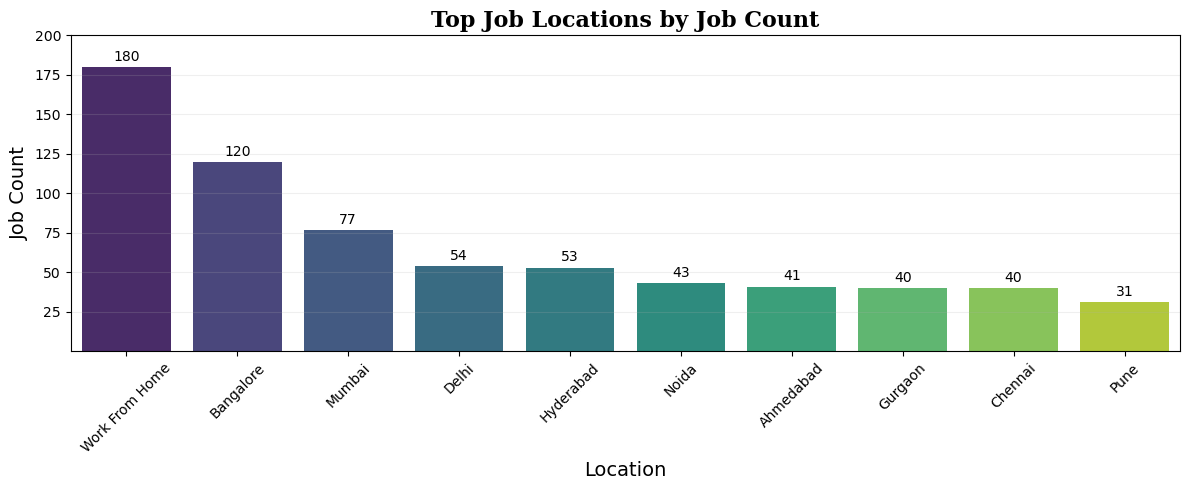

In [7]:
# Standardize the Location column
df["Location"] = df["Location"].str.strip().str.lower().str.title()

# Get top 11 locations including "Unknown"
location_top11 = df["Location"].value_counts().nlargest(11).reset_index()
location_top11.columns = ["Location", "Job Count"]

# Remove "Unknown" if present
location_top10 = location_top11[location_top11["Location"].str.lower() != "unknown"]

# Plotting
plt.figure(figsize=(12, 5))
barplot = sns.barplot(x="Location", y="Job Count", data=location_top10, palette="viridis", hue="Location", legend=False)

# Add numbers above bars
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2, height + 2, int(height), ha='center', va='bottom')

plt.title("Top Job Locations by Job Count", fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.xlabel("Location", fontsize=14)
plt.ylabel("Job Count", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(np.arange(25, 225, 25))
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

## 2) Known vs Unknown Job Locations

In [18]:
# Count all locations
x = df["Location"].value_counts().reset_index()
x.columns = ["Location", "Count"]

# Count of unknown jobs
unknown_count = x[x["Location"].str.lower() == "unknown"]["Count"].sum()

# Count of total jobs
total_count = x["Count"].sum()

# Count of known jobs
known_count = total_count - unknown_count

# Create new DataFrame
location_summary = pd.DataFrame({"Location Type": ["Known", "Unknown"], "Job Count": [known_count, unknown_count]})

location_summary

,Location Type,Job Count
0,Known,966
1,Unknown,35


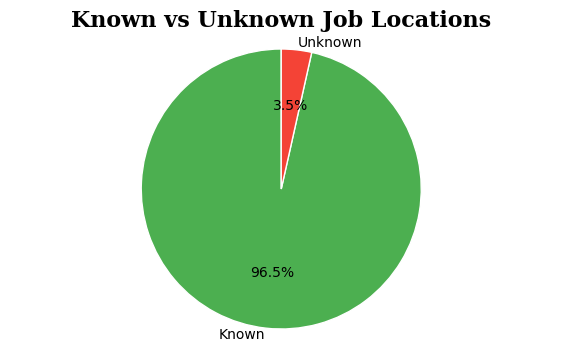

In [21]:
plt.figure(figsize=(7, 4))
plt.pie(location_summary["Job Count"], labels=location_summary["Location Type"], colors=["#4CAF50", "#F44336"], autopct="%1.1f%%", 
        startangle=90, labeldistance=1.05, wedgeprops={'edgecolor': 'white'})

plt.title("Known vs Unknown Job Locations", fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.axis("equal")
plt.show()

## 3) No. of Job Listings by Required Experience

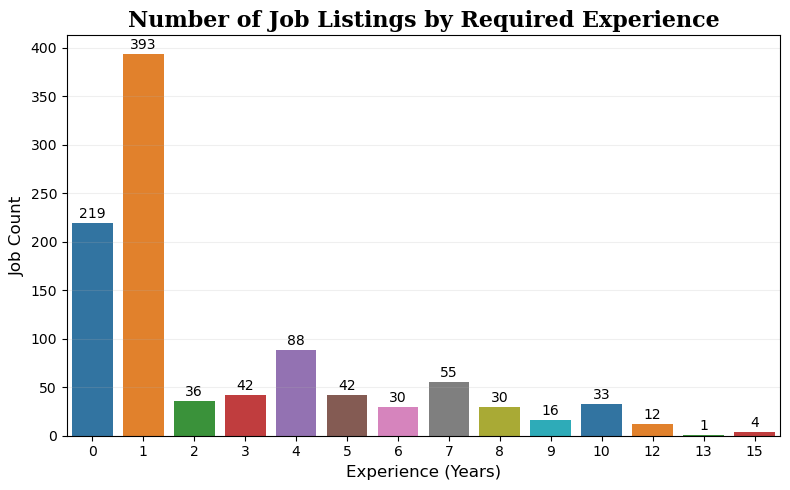

In [24]:
plt.figure(figsize=(8, 5))
barplot = sns.countplot(x="Cleaned_Experience (Years)", data=df, palette="tab10", hue="Cleaned_Experience (Years)", legend=False)

# Add numbers above bars
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2, height + 2, int(height), ha='center', va='bottom')

plt.title("Number of Job Listings by Required Experience", fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.xlabel("Experience (Years)", fontsize=12)
plt.ylabel("Job Count", fontsize=12)
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

## 4) Job Listings by Salary Type

In [27]:
# Count all salary type
df2 = df["Cleaned_Salary"].value_counts().reset_index().copy()
df2.columns=(["Salary", "Count"])

# Count of Competitive salary
CS_count = df2[df2["Salary"].str.lower() == "competitive salary"]["Count"].sum()

# Count of total salary type
Total = df2["Count"].sum()

# Count of integer salary
Dis_Salary_count = Total - CS_count

# Create new DataFrame
Salary_Count_Df = pd.DataFrame({"Salary Type":["Disclosed Salary", "Competitive Salary"], "Count":[Dis_Salary_count, CS_count]})
Salary_Count_Df

,Salary Type,Count
0,Disclosed Salary,750
1,Competitive Salary,251


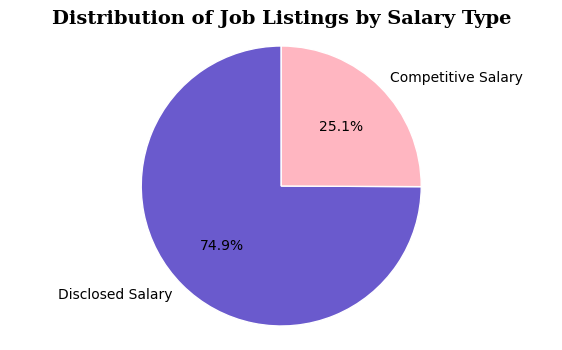

In [29]:
plt.figure(figsize=(7, 4))
plt.pie(Salary_Count_Df["Count"], labels=Salary_Count_Df["Salary Type"], autopct="%1.1f%%", startangle=90, 
        wedgeprops={'edgecolor': 'white'}, colors = ["#6A5ACD", "#FFB6C1"])

plt.title("Distribution of Job Listings by Salary Type", fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.axis("equal")
plt.show()

## 5) Salary vs Experience

In [32]:
# Filtering integer values from "Cleaned_Salary" column
df_new = df[df["Cleaned_Salary"] != "Competitive Salary"].copy()
df_new["Cleaned_Salary"] = df_new["Cleaned_Salary"].astype(int)

df_new

,Title,Company,Location,Cleaned_Salary,Time (days ago),Cleaned_Experience (Years)
0,.NET Developer,Sped@home,Mumbai,275000,7,1
1,Associate Software Developer,Design Centric,Navi Mumbai,359000,21,1
2,Associate Software Developer,Design Centric,Mumbai,359000,21,1
3,Founders Office,Curious About Sales,Nagpur,325000,3,0
4,3D Artist & VFX Artist,Connex India,Delhi,220000,5,1
...,...,...,...,...,...,...
994,SAP GTS Consultant,Kiash Solutions LLP,Chennai,2000000,21,7
995,SAP GTS Consultant,Kiash Solutions LLP,Hyderabad,2000000,21,7
996,SAP GTS Consultant,Kiash Solutions LLP,Bangalore,2000000,21,7
999,Jr. Database Developer,Xomic Infotech Private Limited,Ahmedabad,300000,21,1


In [34]:
df_new.dtypes

Title                         object
Company                       object
Location                      object
Cleaned_Salary                 int32
Time (days ago)                int64
Cleaned_Experience (Years)     int64
dtype: object

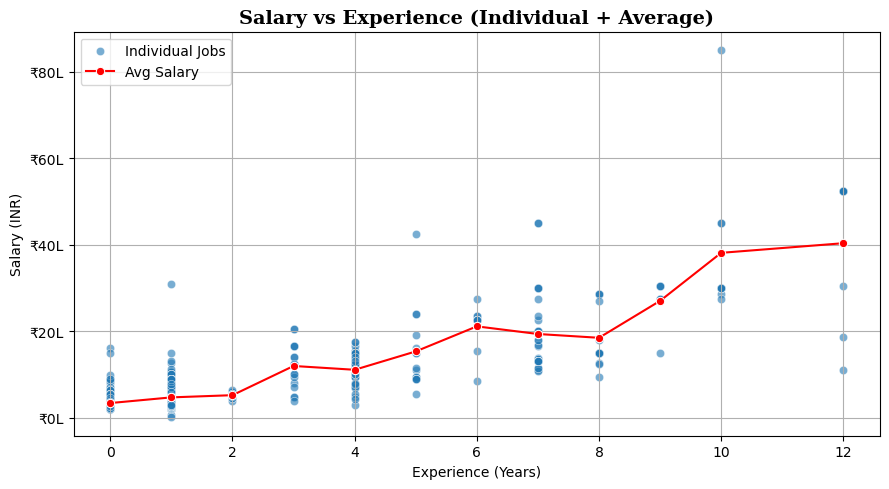

In [36]:
plt.figure(figsize=(9, 5))

# Scatter plot of raw data
sns.scatterplot(data=df_new, x="Cleaned_Experience (Years)", y="Cleaned_Salary", alpha=0.6, label="Individual Jobs")

# Line plot of average salary
df_avg = df_new.groupby("Cleaned_Experience (Years)")["Cleaned_Salary"].mean().reset_index()
sns.lineplot(data=df_avg, x="Cleaned_Experience (Years)", y="Cleaned_Salary", color="red", marker="o", label="Avg Salary")

plt.title("Salary vs Experience (Individual + Average)", fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.xlabel("Experience (Years)")
plt.ylabel("Salary (INR)")
plt.yticks(
    ticks=[i * 1000000 for i in range(0, 10, 2)],
    labels=[f'₹{i*10}L' for i in range(0, 10, 2)]
)
plt.grid(True)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

## Get Top 10 Companies by Job Count

In [39]:
top_companies = df["Company"].value_counts().nlargest(10).reset_index()
top_companies.columns = ["Company", "Count"]

## 6) Top 10 Hiring Companies

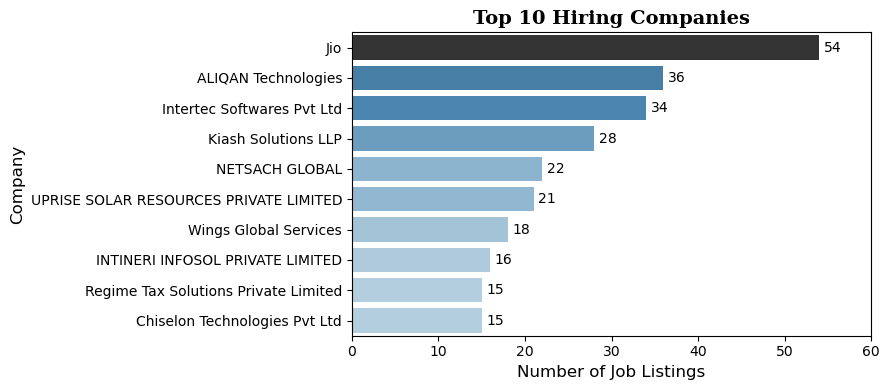

In [42]:
plt.figure(figsize=(9, 4))
barplot = sns.barplot(data=top_companies, x="Count", y="Company", palette="Blues_d", hue="Count", legend=False)

# Add count labels at the end of each bar
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.5, p.get_y() + p.get_height() / 2,
             int(width), ha='left', va='center')

plt.title("Top 10 Hiring Companies", fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Company", fontsize=12)
plt.xticks(np.arange(0, 65, 10))

plt.tight_layout()
plt.show()

## 7) Avg. Experience by Top 10 Companies

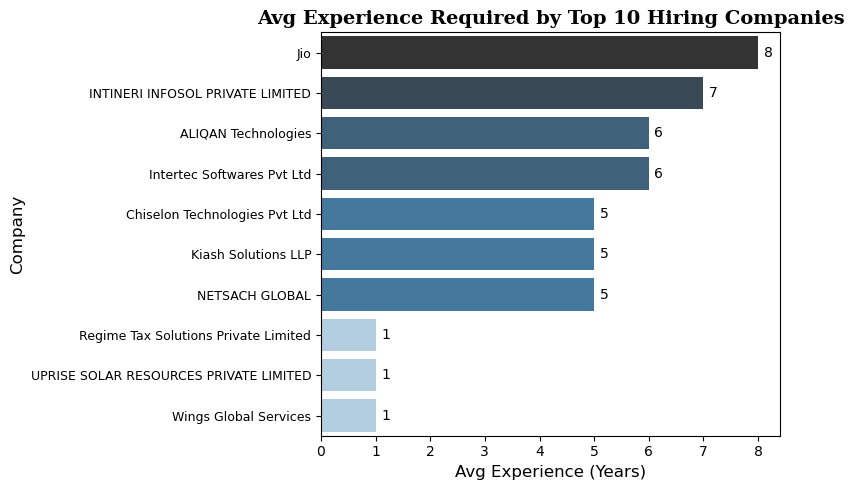

In [45]:
top_company_names = top_companies["Company"]

# Calculate average experience per company
ddff = df.groupby("Company")["Cleaned_Experience (Years)"].mean().reset_index()

# Filter and round experience for top companies
filtered = ddff[ddff["Company"].isin(top_company_names)].copy()
filtered["Cleaned_Experience (Years)"] = filtered["Cleaned_Experience (Years)"].round(0)

# Sort by experience
filtered = filtered.sort_values("Cleaned_Experience (Years)", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(data=filtered, y="Company", x="Cleaned_Experience (Years)", orient='h', palette="Blues_d", legend=False,
    hue="Cleaned_Experience (Years)")

# Add experience values as labels
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2,
             int(width), ha='left', va='center', fontsize=10)

plt.title("Avg Experience Required by Top 10 Hiring Companies", fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.xlabel("Avg Experience (Years)", fontsize=12)
plt.ylabel("Company", fontsize=12)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

## 8) Avg. Salary Offered by Top 10 Companies

In [48]:
top_company_names = top_companies["Company"]

df_top = df[df["Company"].isin(top_company_names)]

df_sal = df_top[df_top["Cleaned_Salary"] != "Competitive Salary"].copy()
df_sal["Cleaned_Salary"] = df_sal["Cleaned_Salary"].astype(int)

# Display salary in full numbers
pd.set_option('display.float_format', '{:,.0f}'.format)

avg_sal = df_sal.groupby("Company")["Cleaned_Salary"].mean().reset_index()
avg_sal.columns = ["Company", "Salary"]
avg_sal = avg_sal.sort_values("Salary", ascending=False, ignore_index=True)
avg_sal

,Company,Salary
0,Chiselon Technologies Pvt Ltd,"3,000,000"
1,Jio,"2,100,000"
2,Kiash Solutions LLP,"1,963,393"
3,INTINERI INFOSOL PRIVATE LIMITED,"1,805,625"
4,ALIQAN Technologies,"1,615,714"
5,UPRISE SOLAR RESOURCES PRIVATE LIMITED,"886,905"
6,Wings Global Services,"875,000"
7,Regime Tax Solutions Private Limited,"720,000"
8,Intertec Softwares Pvt Ltd,"550,000"


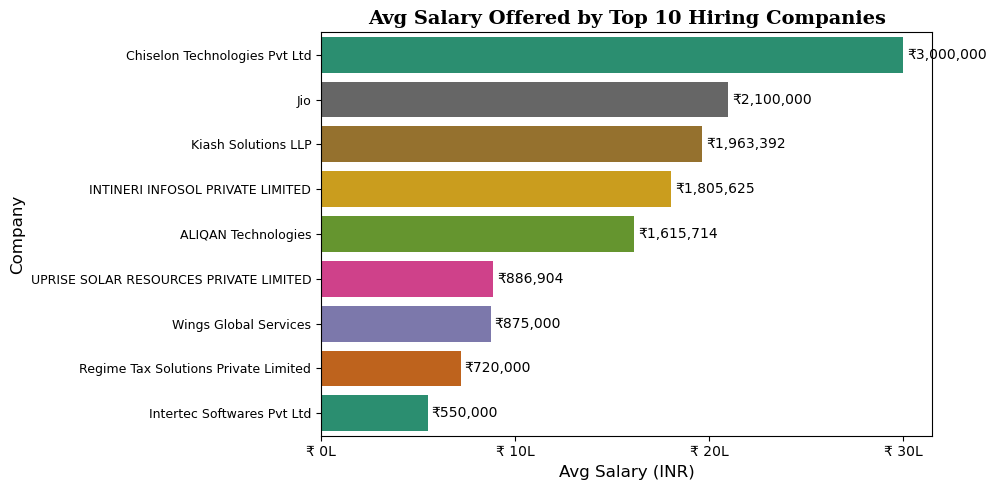

In [207]:
plt.figure(figsize=(10, 5))

barplot = sns.barplot(data=avg_sal, y="Company", x="Salary", orient='h', palette="Dark2", legend=False,
                     hue="Salary")

# Add values as labels
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 20000, p.get_y() + p.get_height() / 2,
             f'₹{int(width):,}', ha='left', va='center', fontsize=10)

plt.title("Avg Salary Offered by Top 10 Hiring Companies", fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.xlabel("Avg Salary (INR)", fontsize=12)
plt.ylabel("Company", fontsize=12)
plt.xticks(
    ticks=[i * 1000000 for i in range(0, 4)],
    labels=[f'₹ {i*10}L' for i in range(0, 4)]
)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

## 9) Salary Type Offered by Top 10 Companies

In [53]:
top_company_names = top_companies["Company"]

df_top = df[df["Company"].isin(top_company_names)].copy()
df_top["Salary_type"] = df_top["Cleaned_Salary"].apply(lambda x: "Competitive Salary" if x == "Competitive Salary" else "Disclosed")
df_top

,Title,Company,Location,Cleaned_Salary,Time (days ago),Cleaned_Experience (Years),Salary_type
175,Associate Software Tester,Regime Tax Solutions Private Limited,Navi Mumbai,575000,7,1,Disclosed
176,Associate Software Tester,Regime Tax Solutions Private Limited,Mumbai,575000,7,1,Disclosed
337,Technical Support Analyst,Regime Tax Solutions Private Limited,Navi Mumbai,300000,14,1,Disclosed
338,Technical Support Analyst,Regime Tax Solutions Private Limited,Mumbai,300000,14,1,Disclosed
341,Frontend Angular Developer,Regime Tax Solutions Private Limited,Navi Mumbai,700000,14,1,Disclosed
...,...,...,...,...,...,...,...
993,Technician Electrician - Utility,Jio,Mumbai,Competitive Salary,21,4,Competitive Salary
994,SAP GTS Consultant,Kiash Solutions LLP,Chennai,2000000,21,7,Disclosed
995,SAP GTS Consultant,Kiash Solutions LLP,Hyderabad,2000000,21,7,Disclosed
996,SAP GTS Consultant,Kiash Solutions LLP,Bangalore,2000000,21,7,Disclosed


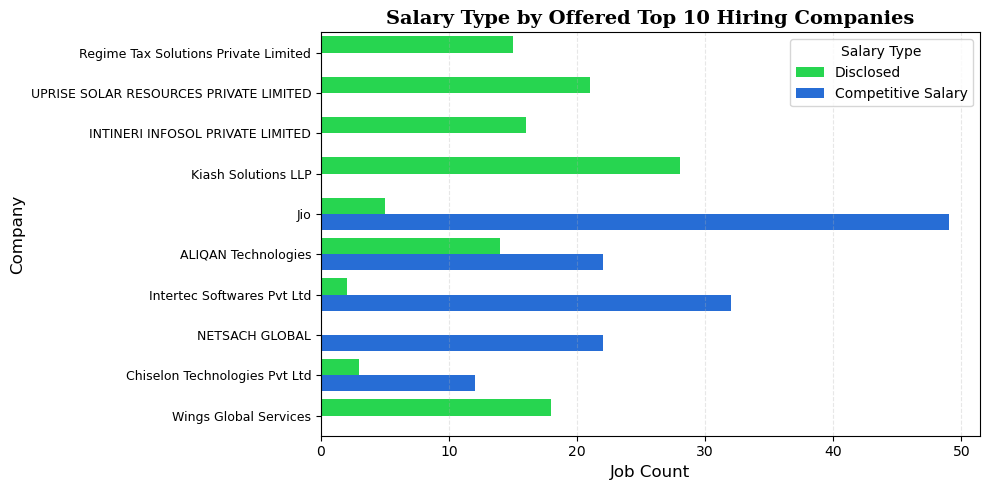

In [55]:
plt.figure(figsize=(10, 5))

barplot = sns.countplot(data=df_top, y="Company", orient='h', hue="Salary_type", 
                        palette={"Disclosed": "#0AF241", "Competitive Salary": "#0A67F2"})

plt.title("Salary Type by Offered Top 10 Hiring Companies", fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.xlabel("Job Count", fontsize=12)
plt.ylabel("Company", fontsize=12)
plt.yticks(fontsize=9)
plt.legend(title="Salary Type")
plt.tight_layout()
plt.grid(axis='x', alpha=0.3, ls='--')
plt.show()

## 10) 

## 11) Experince Required for Top 10 Companies

In [64]:
# DataFrame of Top 10 hiring companies that I have fetched earlier
df_top

,Title,Company,Location,Cleaned_Salary,Time (days ago),Cleaned_Experience (Years),Salary_type
175,Associate Software Tester,Regime Tax Solutions Private Limited,Navi Mumbai,575000,7,1,Disclosed
176,Associate Software Tester,Regime Tax Solutions Private Limited,Mumbai,575000,7,1,Disclosed
337,Technical Support Analyst,Regime Tax Solutions Private Limited,Navi Mumbai,300000,14,1,Disclosed
338,Technical Support Analyst,Regime Tax Solutions Private Limited,Mumbai,300000,14,1,Disclosed
341,Frontend Angular Developer,Regime Tax Solutions Private Limited,Navi Mumbai,700000,14,1,Disclosed
...,...,...,...,...,...,...,...
993,Technician Electrician - Utility,Jio,Mumbai,Competitive Salary,21,4,Competitive Salary
994,SAP GTS Consultant,Kiash Solutions LLP,Chennai,2000000,21,7,Disclosed
995,SAP GTS Consultant,Kiash Solutions LLP,Hyderabad,2000000,21,7,Disclosed
996,SAP GTS Consultant,Kiash Solutions LLP,Bangalore,2000000,21,7,Disclosed


In [66]:
exp_grouped = df_top.groupby(["Company", "Cleaned_Experience (Years)"]).size().reset_index(name="Count")
exp_grouped

,Company,Cleaned_Experience (Years),Count
0,ALIQAN Technologies,3,1
1,ALIQAN Technologies,4,4
2,ALIQAN Technologies,5,8
3,ALIQAN Technologies,6,5
4,ALIQAN Technologies,7,13
5,ALIQAN Technologies,8,3
6,ALIQAN Technologies,9,2
7,Chiselon Technologies Pvt Ltd,2,1
8,Chiselon Technologies Pvt Ltd,4,6
9,Chiselon Technologies Pvt Ltd,7,8


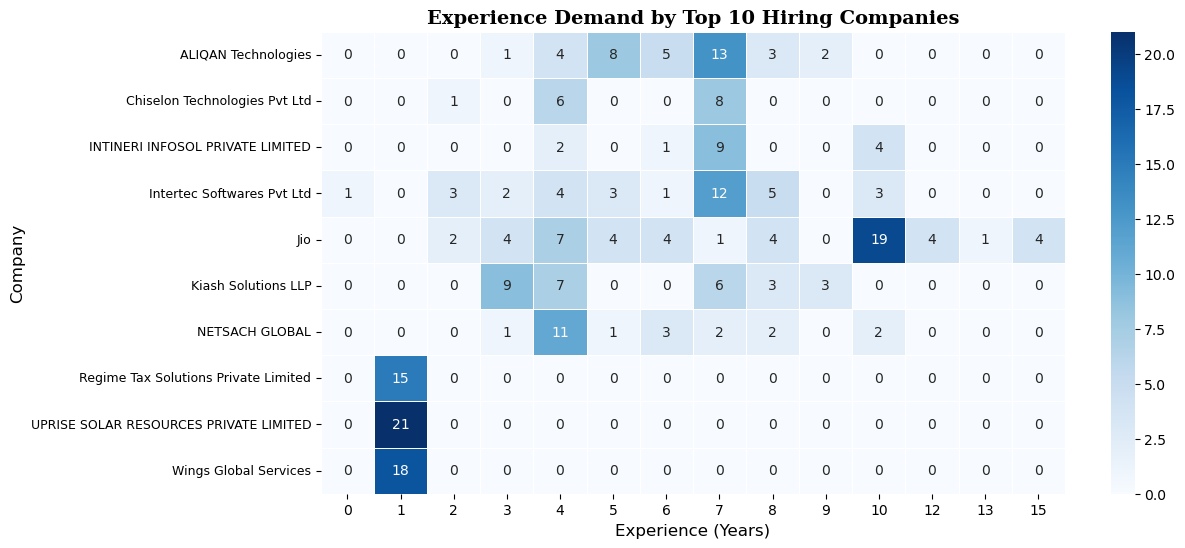

In [69]:
pivot = exp_grouped.pivot(index="Company", columns="Cleaned_Experience (Years)", values="Count").fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Experience Demand by Top 10 Hiring Companies", fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.xlabel("Experience (Years)", fontsize=12)
plt.ylabel("Company", fontsize=12)
plt.yticks(fontsize=9)
plt.show()

## 12) Most Demanding Job Titles in Top 10 Companies

In [71]:
top_title = df_top["Title"].value_counts().nlargest(10).reset_index()
top_title.columns=["Title", "Count"]
top_title

,Title,Count
0,Python Developer,15
1,Java Developer,7
2,Laravel PHP Developer,5
3,Program Manager-Cloud Adoption,4
4,Deveops Engineer,4
5,Flutter Developer,4
6,Data Engineer,4
7,Cloud Solution Architect,4
8,Dotnet Azure Developer,3
9,Pvt. Cloud SME/Architect,3


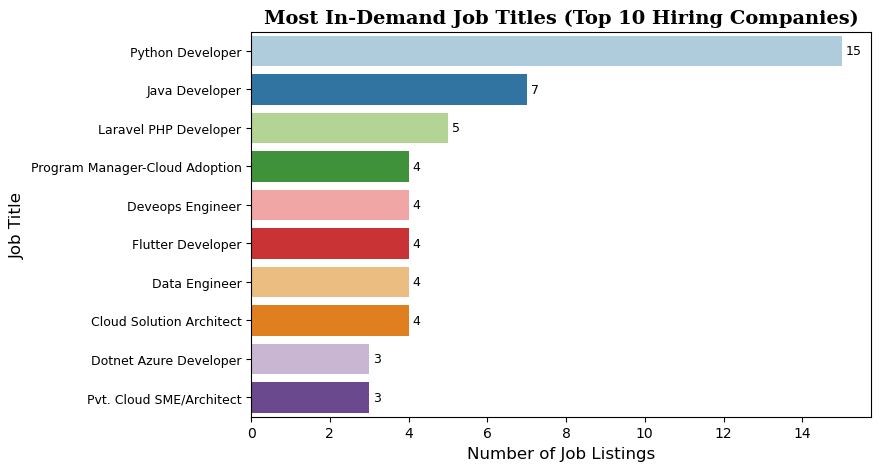

In [73]:
plt.figure(figsize=(8, 5))

barplot = sns.barplot(data=top_title, y="Title", x="Count", orient='h', palette="Paired", hue="Title", legend=False)

# Add count labels on bars
for bar in barplot.patches:
    width = bar.get_width()
    plt.text(
        width + 0.1,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width)}",
        va='center',
        fontsize=9
    )

plt.title("Most In-Demand Job Titles (Top 10 Hiring Companies)", fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Job Title", fontsize=12)
plt.yticks(fontsize=9)
plt.show()

## 13) Proportion of Job Listings: Top 10 vs Others

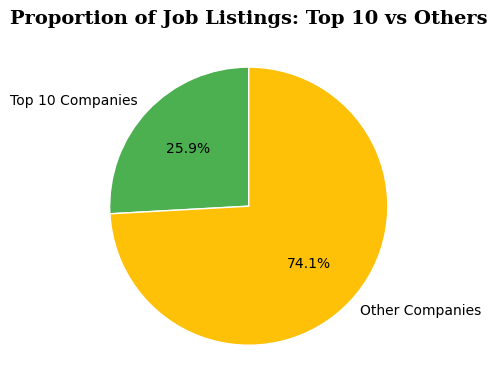

In [77]:
# Count job postings per company
company_counts = df["Company"].value_counts()

top10 = company_counts[:10].sum()
others = company_counts[10:].sum()

# Pie chart
plt.figure(figsize=(6, 4))
plt.pie([top10, others], labels=["Top 10 Companies", "Other Companies"],
        autopct="%1.1f%%", startangle=90, colors=["#4CAF50", "#FFC107"], wedgeprops={"edgecolor":"white"})

plt.title("Proportion of Job Listings: Top 10 vs Others", fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.tight_layout()
plt.show()

## 14) Most Demanding Job Titles

In [80]:
# Top 10 Hiring Companies
df_top

# Top 10 Hiring Companies names
top_company_names = top_companies["Company"]

# Companies other than top 10
other_company_df = df[~df["Company"].isin(top_company_names)]
other_company_df

,Title,Company,Location,Cleaned_Salary,Time (days ago),Cleaned_Experience (Years)
0,.NET Developer,Sped@home,Mumbai,275000,7,1
1,Associate Software Developer,Design Centric,Navi Mumbai,359000,21,1
2,Associate Software Developer,Design Centric,Mumbai,359000,21,1
3,Founders Office,Curious About Sales,Nagpur,325000,3,0
4,3D Artist & VFX Artist,Connex India,Delhi,220000,5,1
...,...,...,...,...,...,...
990,IOS Development,Dark Starss,Mumbai,475000,21,1
991,Senior SEO Specialist,Nexus Jobs,Jaipur,420000,21,4
997,React Native Developer,Versatile Commerce,Hyderabad,Competitive Salary,21,1
999,Jr. Database Developer,Xomic Infotech Private Limited,Ahmedabad,300000,21,1


In [82]:
most_demanding_job_count = df["Title"].value_counts().nlargest(12).reset_index()
most_demanding_job_count.columns=["Title", "Count"]
most_demanding_job_count

,Title,Count
0,Full Stack Developer,66
1,Python Developer,31
2,Java Developer,16
3,.NET Developer,15
4,Junior Software Developer,14
5,Associate Software Developer,13
6,Backend Developer,12
7,Information Technology Engineer,11
8,WordPress Developer,11
9,PHP Developer,11


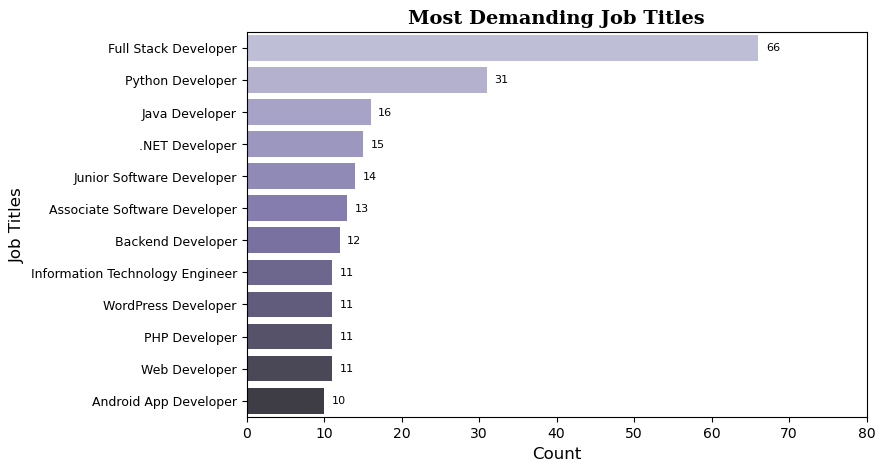

In [84]:
plt.figure(figsize=(8, 5))

barplot = sns.barplot(data=most_demanding_job_count, y="Title", x="Count", palette="Purples_d", hue="Title", legend=False)

# Add value labels above bars
for p in barplot.patches:
    width = p.get_width()
    y_pos = p.get_y() + p.get_height() / 2
    barplot.text(
        width + 1, y_pos,
        int(width),
        va='center', ha='left', fontsize=8
    )

plt.title("Most Demanding Job Titles", fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.xlabel("Count", fontsize=12)
plt.ylabel("Job Titles", fontsize=12)
plt.xticks(np.arange(0, 90, 10))
plt.yticks(fontsize=9)
plt.show()

In [86]:
time_counts = df["Time (days ago)"].value_counts().sort_index().reset_index()
time_counts.columns = ["Days Ago", "Job Count"]
time_counts

,Days Ago,Job Count
0,0,12
1,1,28
2,2,26
3,3,32
4,4,49
5,5,29
6,6,16
7,7,201
8,14,144
9,21,464


## 15) Job Postings Over Time

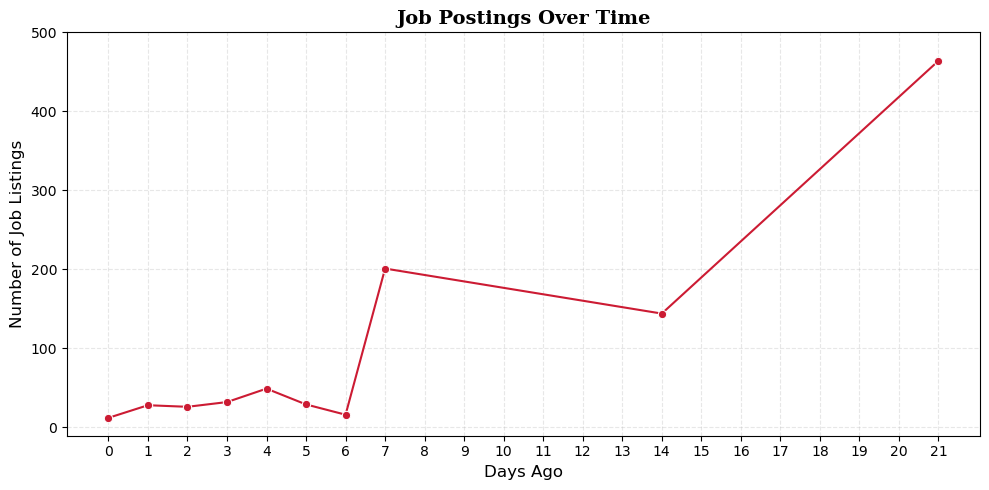

In [89]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=time_counts, x="Days Ago", y="Job Count", marker="o", color="#CC1B33")

plt.title("Job Postings Over Time", fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.xlabel("Days Ago", fontsize=12)
plt.ylabel("Number of Job Listings", fontsize=12)
plt.xticks(np.arange(0, 22))
plt.yticks(np.arange(0, 600, 100))
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## 16) Most Popular Job Fields

In [92]:
field_keywords = {
    "Web Development": ["web developer", "full stack developer", "react", "php", "backend developer", 
                        "front end developer", "mern", "node.js", "next js", "js", "rest", 
                        "website developer", "angular", "dotnet", "wordpress"],
    
    "Data Science": ["data scientist", "analyst", "python developer", "python", "data engineer", 
                     "database", "power bi", "tableau", "ai & ml", "ai/ml", "ai ml"],
    
    "Software Engineering": ["trainee engineer", "java developer", ".net", "software developer", "software"],
    
    "Design & Animation": ["vfx", "3d", "artist", "graphic", "photo editor", "ux", "ui"],
    
    "Cyber Security": ["cyber security", "security"],
    
    "Mobile App Development": ["ios", "android", "mobile app", "mobile"],

    "DevOps": ["deveops", "devops"],
    
    "Game Development": ["game"]
}

In [94]:
def classify_fields(title):
    title_lower = title.lower()
    for field, keywords in field_keywords.items():
        if any(keyword in title_lower for keyword in keywords):
            return field
    return "Others"

New_Df = df.copy()

New_Df["Field"] = New_Df["Title"].apply(classify_fields)
New_Df

,Title,Company,Location,Cleaned_Salary,Time (days ago),Cleaned_Experience (Years),Field
0,.NET Developer,Sped@home,Mumbai,275000,7,1,Software Engineering
1,Associate Software Developer,Design Centric,Navi Mumbai,359000,21,1,Software Engineering
2,Associate Software Developer,Design Centric,Mumbai,359000,21,1,Software Engineering
3,Founders Office,Curious About Sales,Nagpur,325000,3,0,Others
4,3D Artist & VFX Artist,Connex India,Delhi,220000,5,1,Design & Animation
...,...,...,...,...,...,...,...
996,SAP GTS Consultant,Kiash Solutions LLP,Bangalore,2000000,21,7,Others
997,React Native Developer,Versatile Commerce,Hyderabad,Competitive Salary,21,1,Web Development
998,Power BI Consultant,NETSACH GLOBAL,Bangalore,Competitive Salary,21,4,Data Science
999,Jr. Database Developer,Xomic Infotech Private Limited,Ahmedabad,300000,21,1,Data Science


In [96]:
field_count = New_Df["Field"].value_counts().reset_index()
field_count.columns=["Field", "Count"]
field_count.drop(index=0, inplace=True)
field_count

,Field,Count
1,Web Development,236
2,Software Engineering,142
3,Data Science,91
4,Mobile App Development,39
5,Design & Animation,19
6,Cyber Security,14
7,DevOps,11
8,Game Development,5


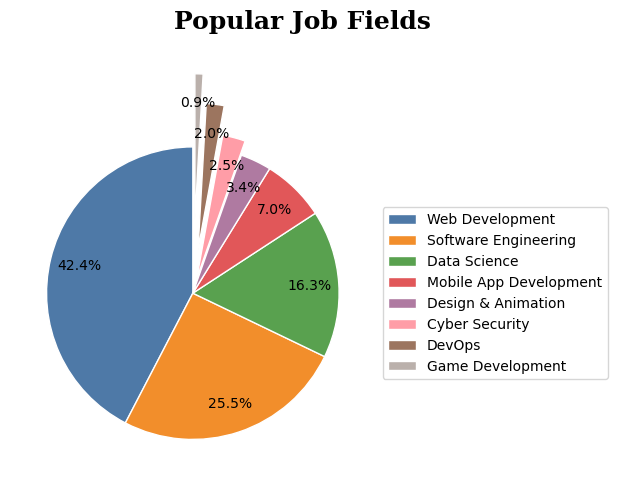

In [98]:
plt.figure(figsize=(10, 5))

colors = ['#4e79a7', '#f28e2b', '#59a14f', '#e15759', '#af7aa1', '#ff9da7', '#9c755f', '#bab0ab']

plt.pie(field_count["Count"], labels=None, startangle=90, autopct="%1.1f%%", pctdistance=0.8,
       explode=((0, 0, 0, 0, 0, 0.1, 0.3, 0.5)), wedgeprops={"ec":"white"}, colors=colors)

plt.title("Popular Job Fields", fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'serif'}, y=1.2, x=0.8)
plt.legend(field_count["Field"], loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout()
plt.show()

## 17) Proportion of Freshers vs Experienced

In [101]:
exp_DF = df.copy()

In [103]:
def classify_employee_by_experience(years_of_experience):
    try:
        if years_of_experience < 2:
            return "Fresher"
        else:
            return "Experienced"
    except TypeError:
        return "Error"

exp_DF["Employee_Type"] = df["Cleaned_Experience (Years)"].apply(classify_employee_by_experience)

In [105]:
exp_DF

,Title,Company,Location,Cleaned_Salary,Time (days ago),Cleaned_Experience (Years),Employee_Type
0,.NET Developer,Sped@home,Mumbai,275000,7,1,Fresher
1,Associate Software Developer,Design Centric,Navi Mumbai,359000,21,1,Fresher
2,Associate Software Developer,Design Centric,Mumbai,359000,21,1,Fresher
3,Founders Office,Curious About Sales,Nagpur,325000,3,0,Fresher
4,3D Artist & VFX Artist,Connex India,Delhi,220000,5,1,Fresher
...,...,...,...,...,...,...,...
996,SAP GTS Consultant,Kiash Solutions LLP,Bangalore,2000000,21,7,Experienced
997,React Native Developer,Versatile Commerce,Hyderabad,Competitive Salary,21,1,Fresher
998,Power BI Consultant,NETSACH GLOBAL,Bangalore,Competitive Salary,21,4,Experienced
999,Jr. Database Developer,Xomic Infotech Private Limited,Ahmedabad,300000,21,1,Fresher


In [107]:
emp_type = exp_DF["Employee_Type"].value_counts().reset_index()
emp_type

,Employee_Type,count
0,Fresher,612
1,Experienced,389


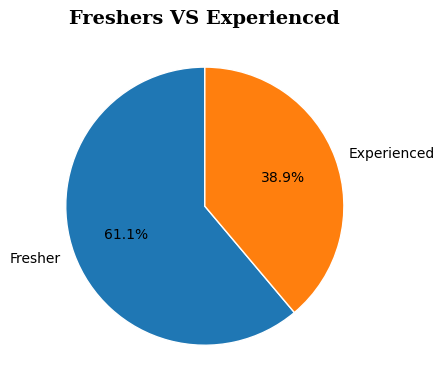

In [109]:
plt.figure(figsize=(7, 4))
plt.pie(emp_type["count"], labels=emp_type["Employee_Type"], autopct="%1.1f%%", startangle=90, wedgeprops={"ec":"white"})

plt.title("Freshers VS Experienced", fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.tight_layout()
plt.show()

## 18) Avg. Salary Based on Employee Type (Fresher vs Experienced)

In [179]:
# Filtering only int from Cleaned_Salary column
x = exp_DF[exp_DF['Cleaned_Salary'].apply(lambda a: str(a).isdigit())].copy()
x["Cleaned_Salary"] = x["Cleaned_Salary"].astype(int) # str --> int

emp_type_mean = x.groupby("Employee_Type")["Cleaned_Salary"].mean().reset_index()
emp_type_mean

,Employee_Type,Cleaned_Salary
0,Experienced,"1,751,104"
1,Fresher,"422,332"


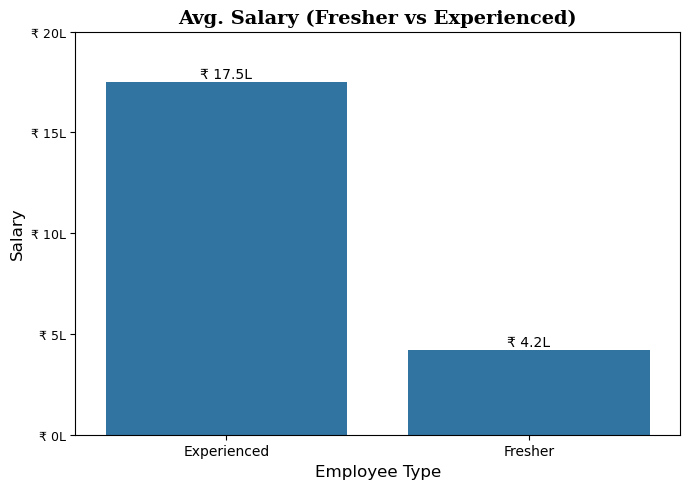

In [234]:
plt.figure(figsize=(7, 5))

ax = sns.barplot(x="Employee_Type", y="Cleaned_Salary", data=emp_type_mean)

# Add numbers above bars
for bar in ax.patches:
    height = bar.get_height()         # Get bar height (salary)
    x = bar.get_x() + bar.get_width()/2   # Center of the bar
    y = height                        # Top of the bar
    plt.text(x, y + 20000,            # Position (slightly above bar)
             f"₹ {height/100000:.1f}L",    # Label text
             ha='center', fontsize=10)

plt.title("Avg. Salary (Fresher vs Experienced)", fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.xlabel("Employee Type", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.yticks(
    ticks=[i*100000 for i in range(0, 25, 5)],
    labels=[f"₹ {i}L" for i in range(0, 25, 5)],
    fontsize=9
)
plt.tight_layout()
plt.show()

## 19) Companies that are hiring freshers

In [165]:
exp_DF[exp_DF["Employee_Type"] == "Fresher"][["Company"]]\
.drop_duplicates().sort_values(by="Company")\
.reset_index(drop=True)

,Company
0,AI.Rawat
1,AIVOA
2,AKSI AEROSPACE
3,AMIT SINGH
4,AN GLOBAL SERVICES
...,...
367,ZAi-Fi
368,ZOOT DIGITAL SEO
369,Zedex Info Private Limited
370,Zepcruit


## 20) Companies that were active recently

In [129]:
df[df["Time (days ago)"] < 2][["Company", "Time (days ago)"]]\
.sort_values(by="Time (days ago)")\
.drop_duplicates(subset="Company")\
.reset_index(drop=True)

,Company,Time (days ago)
0,Quantta Analytics,0
1,I-SmokeStack,0
2,Frontlink Technology,0
3,Creations Overseas,0
4,IBA - The Robotized World,0
5,Educase India,0
6,Ergosphere Solution Pvt Ltd.,0
7,AppVersal,0
8,Com.Bot,1
9,Biz4Group LLC,1
